## Prosper Loan Data Analysis

### Investigation Overview
In this investigation, I wanted to look at the characteristics of loans that could be used to predict their Borrower APR. The main focus was on the loan amount, borrower's monthly income, borrower's prosper rating, prosper score,loan term, employment status, occupation and borrower state.


### Dataset Overview
After cleaning the dataset contains 83719 loans with 24 features (including LoanOriginalAmount, BorrowerAPR, StatedMonthlyIncome, ProsperRating (Alpha), EmploymentStatus, Borrower State, Loan Term and many others)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")


In [2]:
# load in the previous saved dataset into a pandas dataframe
df_loan_sv = pd.read_csv('prosperLoanData_cleaned.csv')

In [3]:
# convert Prosper Rating into ordered category
rate_order = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rate_order)

df_loan_sv['ProsperRating (Alpha)'] = df_loan_sv['ProsperRating (Alpha)'].astype(ordered_var)

In [4]:
pd.set_option('display.max_columns', None)
df_loan_sv.head()


,Unnamed: 0,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,InquiriesLast6Months,TotalInquiries,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanNumber,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,Investors,ProsperRating (Alpha),ProsperScore,year,month
0,1,1209647,2014-02-27 08:28:07.900,36,Current,0.12016,0.0920,2,CO,Professional,Employed,3.0,5,"$50,000-74,999",True,6125.000000,134815,10000,2014-03-03 00:00:00.000,318.93,1,A,7.0,2014,2
1,3,658116,2012-10-22 11:02:35.010,36,Current,0.12528,0.0974,16,GA,Skilled Labor,Employed,0.0,1,"$25,000-49,999",True,2875.000000,77296,10000,2012-11-01 00:00:00.000,321.45,158,A,9.0,2012,10
2,4,909464,2013-09-14 18:38:39.097,36,Current,0.24614,0.2085,2,MN,Executive,Employed,1.0,9,"$100,000+",True,9583.333333,102670,15000,2013-09-20 00:00:00.000,563.97,20,D,4.0,2013,9
3,5,1074836,2013-12-14 08:26:37.093,60,Current,0.15425,0.1314,1,NM,Professional,Employed,0.0,2,"$100,000+",True,8333.333333,123257,15000,2013-12-24 00:00:00.000,342.37,1,B,10.0,2013,12
4,6,750899,2013-04-12 09:52:56.147,36,Current,0.31032,0.2712,1,KS,Sales - Retail,Employed,0.0,0,"$25,000-49,999",True,2083.333333,88353,3000,2013-04-18 00:00:00.000,122.67,1,E,2.0,2013,4


In [5]:
df_loan_sv.shape

(83719, 25)

### Distribution of Borrower APR

BorrowerAPR distribution seems fairly normal with an exception of very high peak around ~0.35. There are small peaks centered at 0.1 and 0.2. Only very few loans have APR greater than 0.4

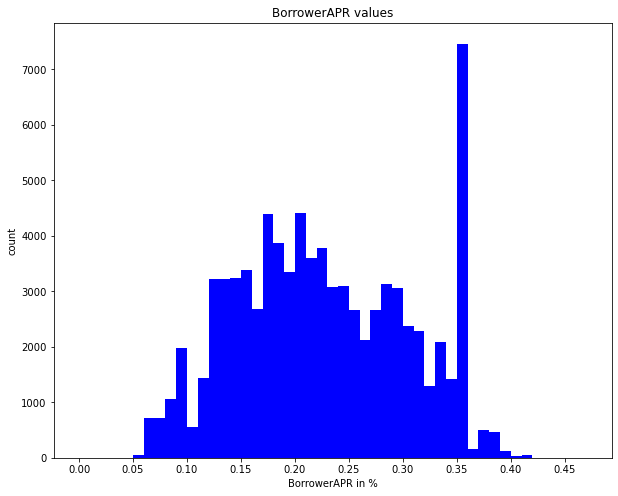

In [6]:
bins = np.arange(0, df_loan_sv.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[10, 8])

plt.hist(data = df_loan_sv, x = 'BorrowerAPR', bins = bins, color = 'Blue');
plt.title('BorrowerAPR values')
plt.xlabel('BorrowerAPR in %')
plt.ylabel('count')
plt.xticks(np.arange(0, df_loan_sv['BorrowerAPR'].max()+0.05, 0.05));

### Distribution of Loan Amount
The very large spikes in frequency 5K, 10K, 15K, 20K, 25K

Text(0, 0.5, 'count')

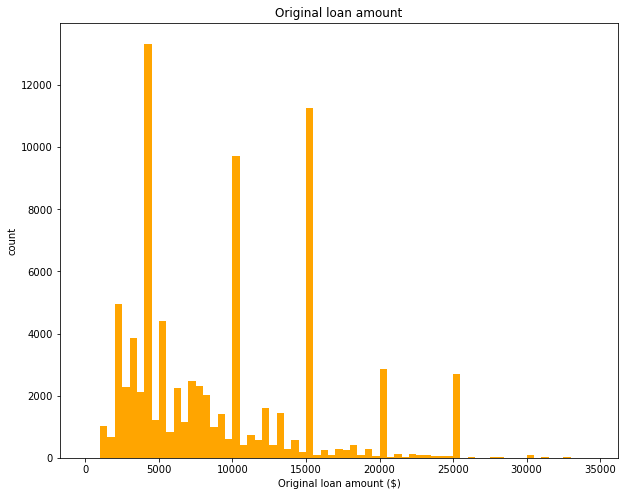

In [7]:
bins_la = np.arange(0, 35000, 500)
plt.figure(figsize=[10, 8])

plt.hist(data = df_loan_sv, x = 'LoanOriginalAmount', bins=bins_la, color= 'Orange');
plt.title('Original loan amount')
plt.xlabel('Original loan amount ($)');
plt.ylabel('count')

### Distribution of loans listed by year and month
There is an upper trend in loans listing yeach passing year. The year with the maximum loans is 2013 year. January is the month with the highest number of loan swhereas April is the month with the least number of loans listed.

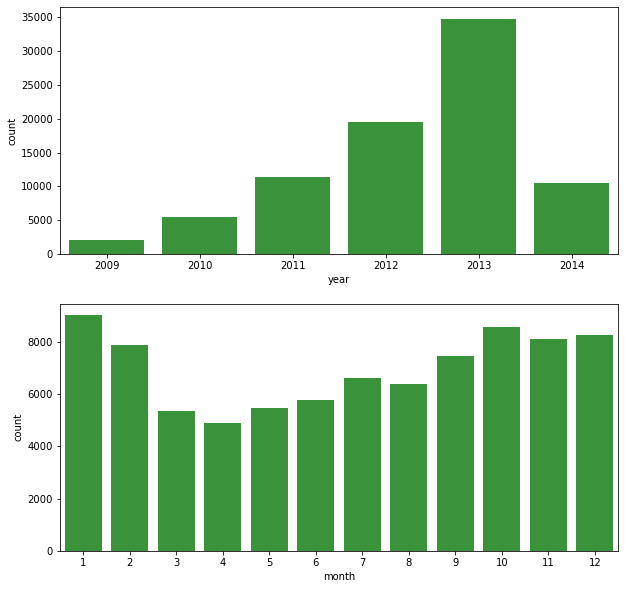

In [8]:
fig, ax = plt.subplots(nrows=2, figsize = [10,10])
default_color = sns.color_palette()[2]
sns.countplot(data = df_loan_sv, x = 'year', color = default_color, ax = ax[0]);
sns.countplot(data = df_loan_sv, x = 'month', color = default_color, ax = ax[1]);

### Correlation between Borrower APR and Original Loan Amount
Variables are negatively correlated,following that the more the loan amount is, the lower the APR.

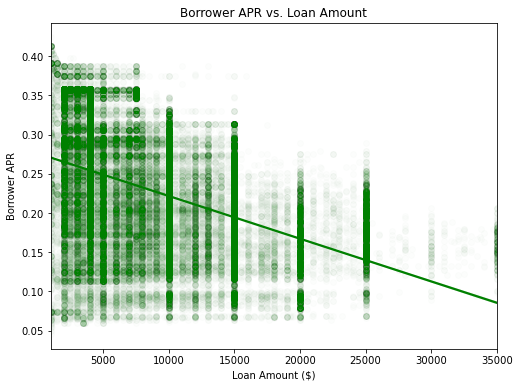

In [9]:
plt.figure(figsize = [8, 6])
sns.regplot(data = df_loan_sv, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.01}, color = 'Green');
plt.xlabel('Loan Amount ($)')
plt.ylabel('Borrower APR')
plt.title('Borrower APR vs. Loan Amount');

### Correlation between Borrower APR and Prosper Score
Prosper Score and Borrower APR are Negatively correlated.

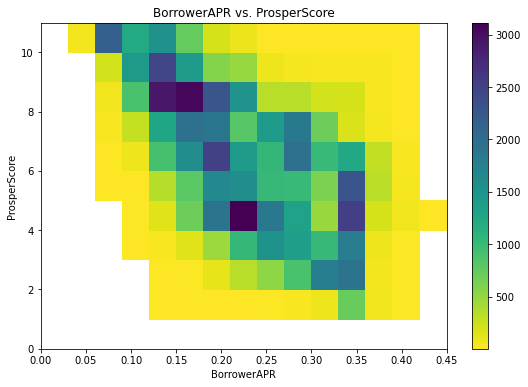

In [10]:
plt.figure(figsize = [20,6])
plt.subplot(1, 2, 2)
bins_x = np.arange(0, df_loan_sv['BorrowerAPR'].max()+0.05, 0.03)
bins_y = np.arange(0, df_loan_sv['ProsperScore'].max()+1, 1)
plt.hist2d(data = df_loan_sv, x = 'BorrowerAPR', y = 'ProsperScore', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('BorrowerAPR')
plt.ylabel('ProsperScore');

### Correlation between Borrower APR and Prosper Rating
The violin plot also shows that the Borrower APR decrease with higher Prosper rating.

Text(0, 0.5, 'BorrowerAPR')

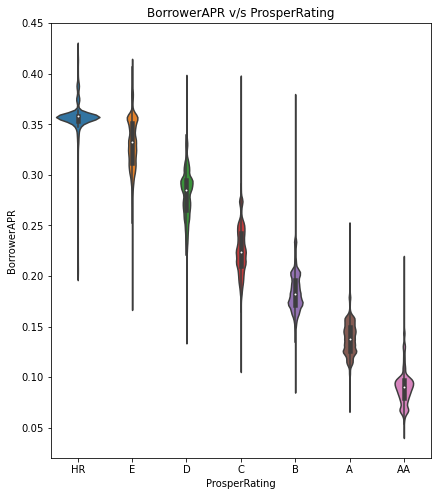

In [11]:
plt.figure(figsize = [25, 10]) 

plt.subplot(1, 2, 1)
sns.violinplot(data = df_loan_sv, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR')
plt.gcf().set_size_inches(15, 8)
plt.title('BorrowerAPR v/s ProsperRating')
plt.xlabel('ProsperRating')
plt.ylabel('BorrowerAPR')

### Prosper Rating Effect on Relationship between APR and Loan Amount
The borrower APR decreases with better rating and the loan amount increases with better rating. The relationship between borrower APR and loan amount turns from negative to slightly positive when the Prosper ratings are increased from HR to A or better.

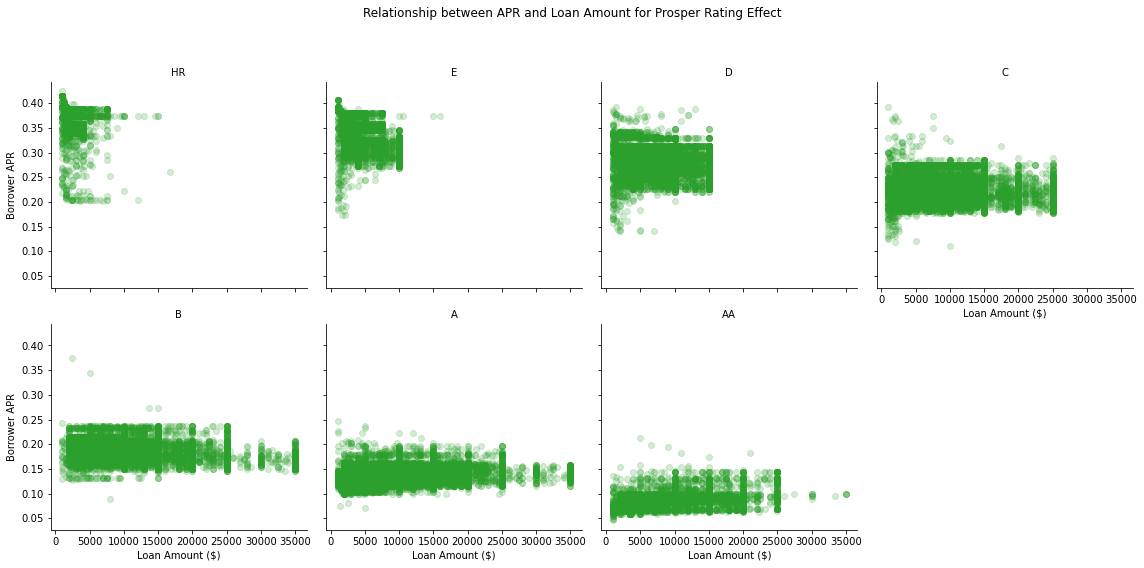

In [12]:
default_color = sns.color_palette()[2]
g=sns.FacetGrid(data=df_loan_sv,col='ProsperRating (Alpha)', height=4, col_wrap=4)
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerAPR',alpha=0.2, color = default_color)
g.set_titles('{col_name}')

g.set_xlabels('Loan Amount ($)')
g.set_ylabels('Borrower APR')
plt.suptitle('Relationship between APR and Loan Amount for Prosper Rating Effect');
plt.subplots_adjust(top=0.85)

### Borrower APR, Monthly Income and Loan Amount by Prosper Rating and Term
1.There is no interaction effect between term and rating for Monthly Income.The pattern of term is similar among different ratings.With better prosper rating the Monthly Income also increases.<br>
2.There is an interaction between term and rating for Loan Original Amount. With better Prosper rating, the loan amount of all three terms increases, the increase amplitude of loan amount between terms also becomes larger.<br>
3. There is no interaction between term and rating for Borrower APR.With better prosper rating the Borrower APR of all three terms decreases.For people with prosper ratings B-AA, the APR increase with the increase of borrow term and for people with prosper ratings HR-C the APR decrease with the increase of borrow term. 

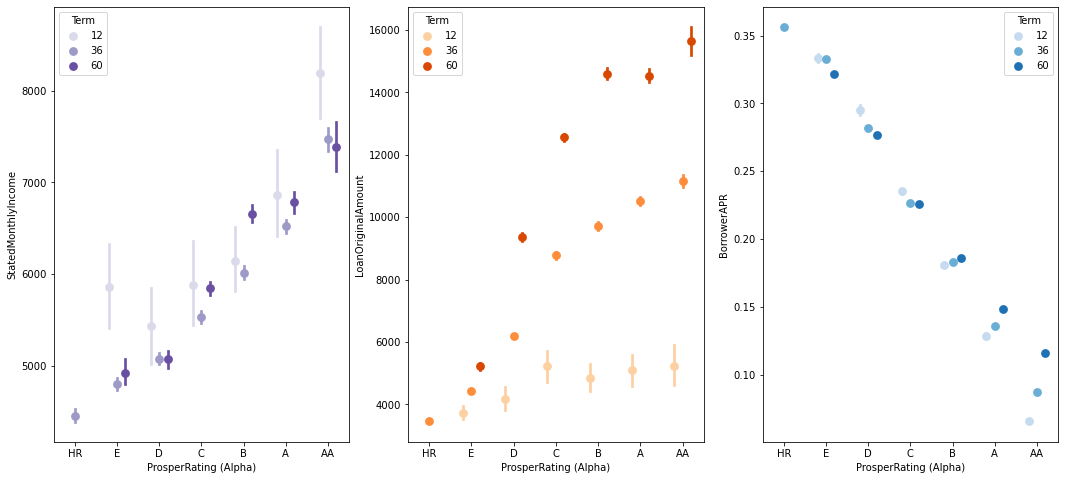

In [13]:
fig, ax = plt.subplots(ncols=3, figsize=[18,8])
sns.pointplot(data = df_loan_sv, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'Term',
           palette = 'Purples', linestyles = '', dodge = 0.4, ax=ax[0])
sns.pointplot(data = df_loan_sv, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Oranges', linestyles = '', dodge = 0.4, ax=ax[1]);
sns.pointplot(data = df_loan_sv, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ax=ax[2]);

### Correlation between Borrower APR and Occupation
The borrower APR changes with the occupation. Junior Students having highest Borrower APR and judges having lowest.

In [14]:
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sns.color_palette()[2]
    sns.boxplot(x=x, y=y, color = default_color)

<Figure size 1440x1440 with 0 Axes>

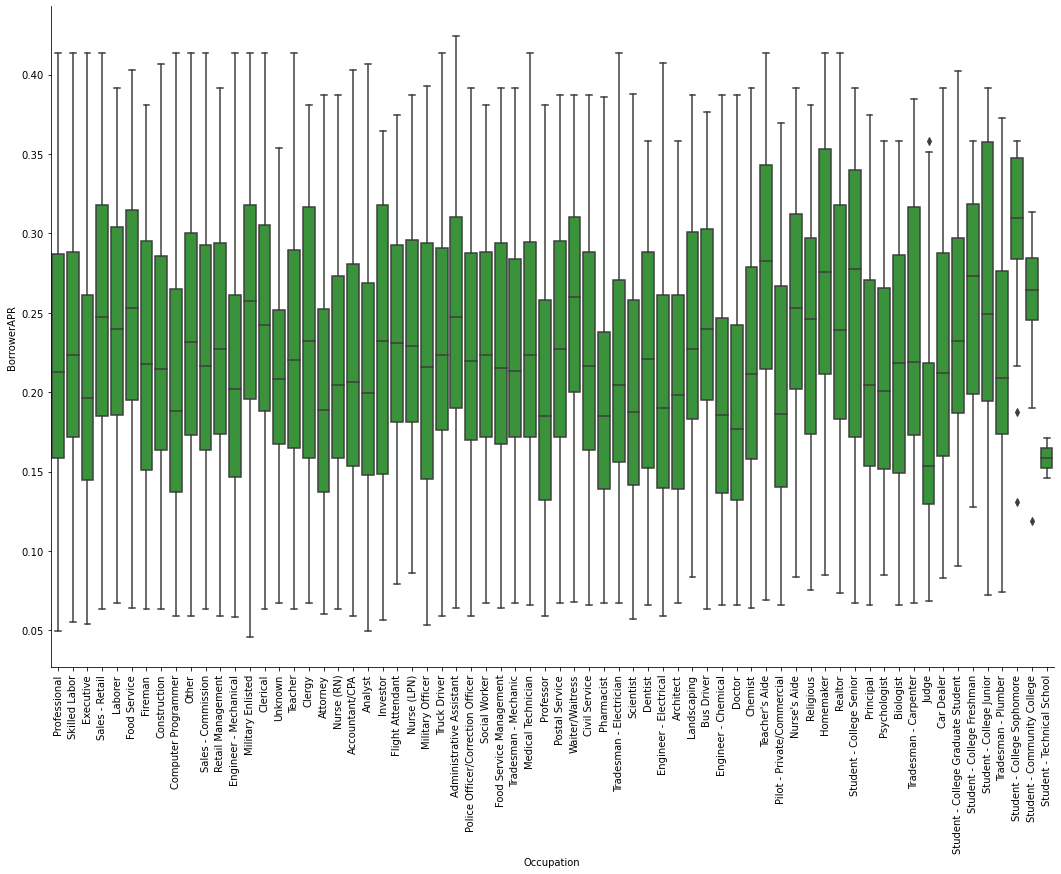

In [15]:
#Borrower APR by Occupation
plt.figure(figsize = [20,20])
g = sns.PairGrid(data = df_loan_sv, y_vars = ['BorrowerAPR'], 
                x_vars = ['Occupation'] , height = 10, aspect = 1.5)
g.map(boxgrid);
plt.xticks(rotation=90);

### Correlation between Borrower State and Term
Most of the people who get loans are from either professional or other occupation. Loans for 36 months are preffered by most of the people and the 12 month  duration for repaymen is the least preffered.

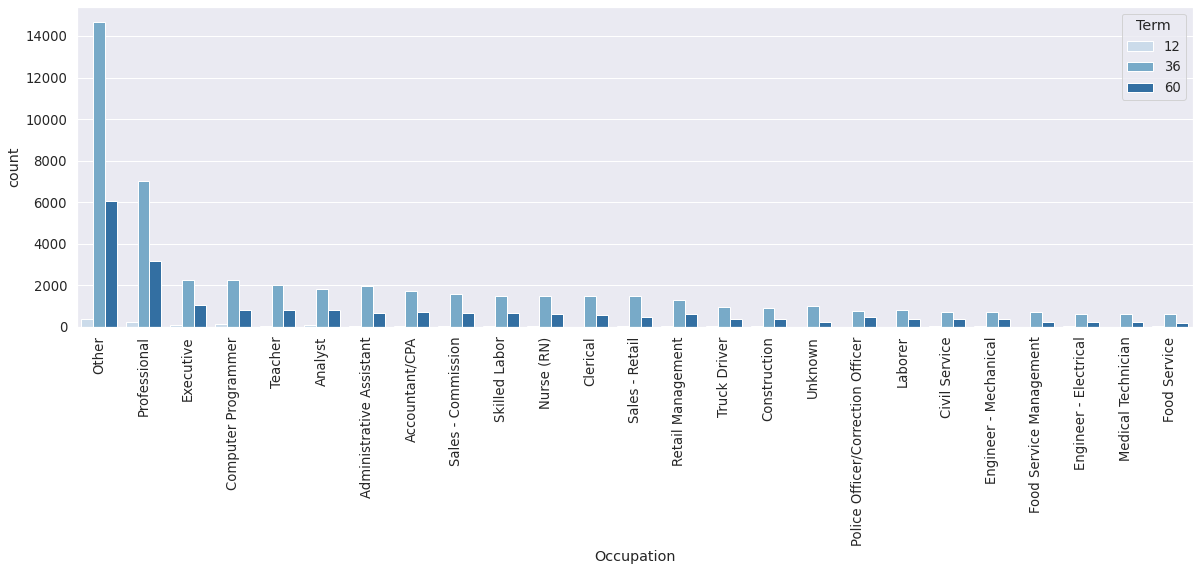

In [16]:
sns.set(font_scale=1.2)
plt.figure(figsize = [20, 20])


# subplot 1: Employment Status vs Term
 
plt.subplot(3, 1, 2)
sns.countplot(data =  df_loan_sv, x = 'Occupation', hue = 'Term', palette = 'Blues',
            order=  df_loan_sv.Occupation.value_counts().iloc[:25].index)
plt.xticks(rotation=90);


plt.show()

